# 신경망 모델 훈련

## 손실 곡선
- 사잇킷런 알고리즘 : 모델의 구조가 어느 정도 고정되어 있음
- 케라스 알고리즘 : 모델의 구조를 직접 만드는 느낌이 강함
- 모델의 코드셀은 print()명령을 사용하지 않더라도 마지막 라인 실행결과를 자동으로 출력
    - 즉 반환되는 결과가 있다는 의미
    - 케라스의 fit()메서드는 History 클래스 객체를 반환 함
- History 클래스 객체
    - 훈련과정에서 계산한 지표, 즉, 손실도 정확도 값이 저장되어 있음
    - 이 값을 사용하여 그래프를 그리면 손실곡선을 그릴 수 있음    

- 케라스는 매 epochs마다 손실을 계산하고 평가지표(metric)를 계산함

**epoch 마다 손실을 감소하고 정확도가 증가함**
- epoch를 늘려볼 필요가 있어보임

- epoch를 늘릴수록 손실은 감소하고 정확도는 증가함
    - but, 고려해야 할 상황이 있음. 
    - epoch를 늘린다는건 그만큼 반복학습을 진행한다는 말이므로 과대적합의 가능성을 고려해야 함
        - epoch의 수는 과소/과대 적합과 관련이 있음

## 검증 손실
- 과대/과소 적합을 파악하기 위해 훈련세트에대한 점수 뿐만이 아니라 검증세트에 대한 점수도 필요
- 손실을 이용하여 과대/과소 적합을 확인
- **인공 신경망 모델이 최적화 하는 대상은 정확도가 아니라 손실함수 임**
    - 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있음. 기준을 정확도가 아닌 손실함수에 두고 판단해야 함
    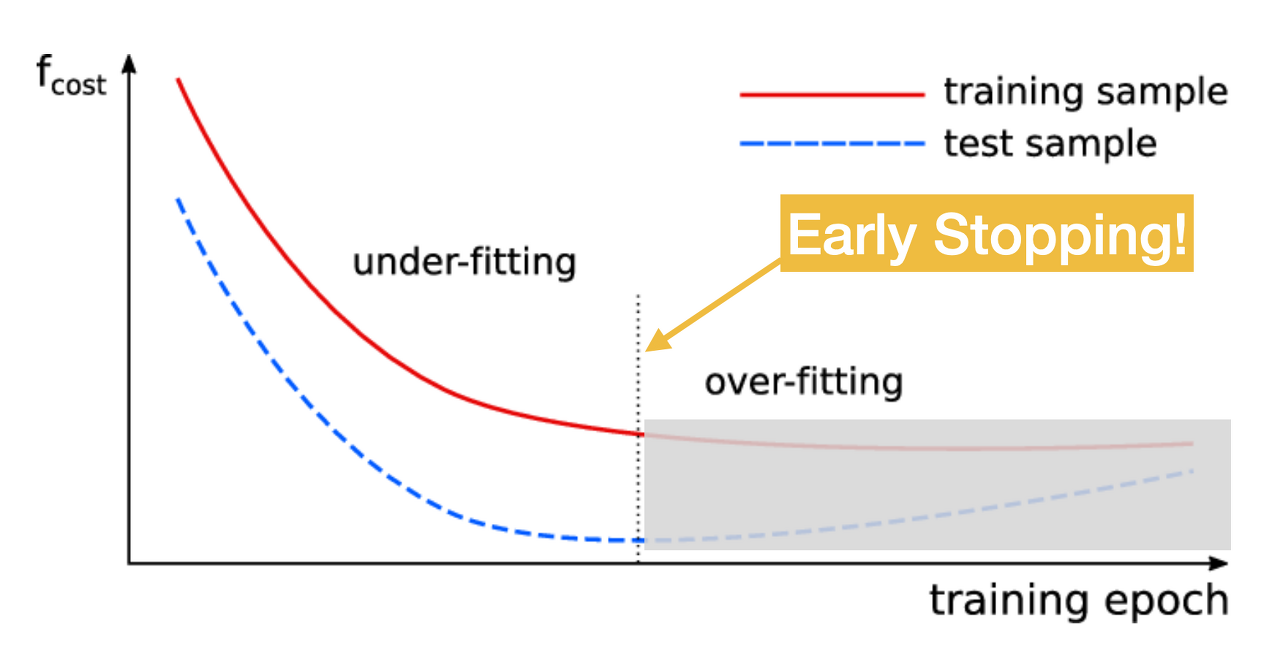
    - 그림 원본: https://c11.kr/r6g5

- 초기에 검증손실이 감소하다가 3-4 사이에증가 후 7정도에서 한번 더 감소 후 다시 증가세를 보임
    - 실행결과는 달라질 수 있음
- 훈련 손실을 꾸준히 감소하고 있는 중 이기 때문에 전형적인 과대 적합 모형이 일정 epoch 이후 나타남
- 목표는 검증손실이 증가하는 시점을 최대한 뒤로 미루는 것

- 등락이 있기는 하지만 13-14번째 에포크까지 약간의 손실 감소를 보임

## 드롭아웃

- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 끔(출력을 0으로 만듬)으로써 일반화 시켜 과대적합을 막는 방법
- 샘플들마다 다른(랜덤하게) 뉴런을 끔
- 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있으므로 모든 입력에 주의를 기울이게 됨
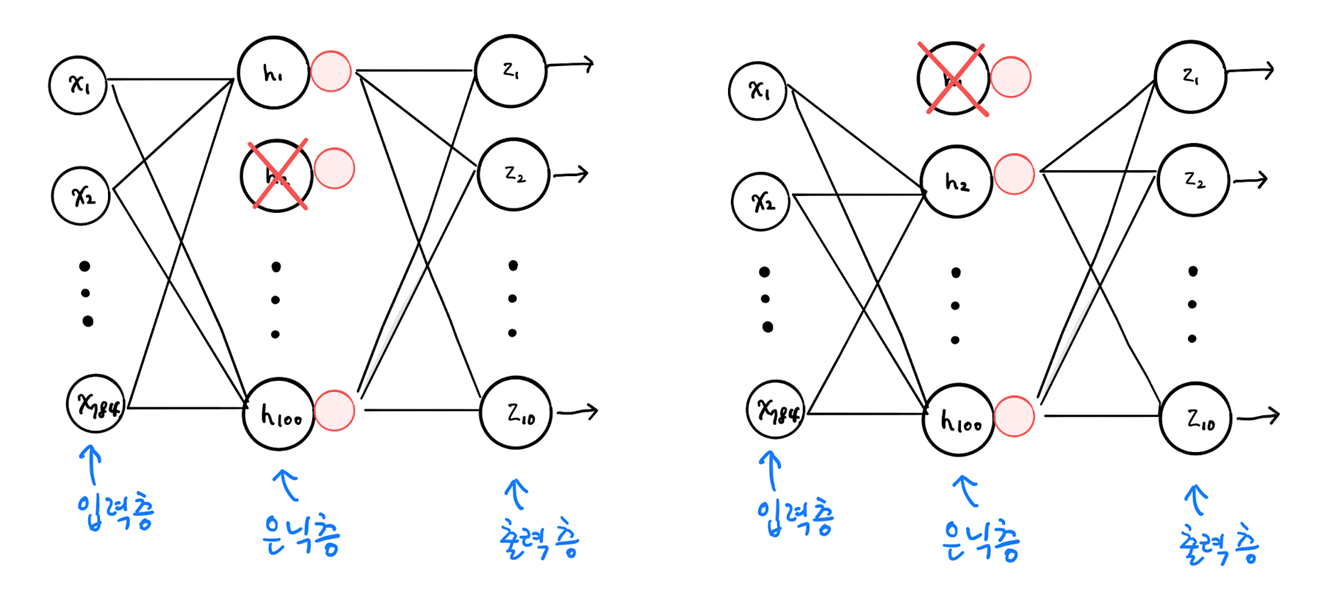

- 모델의 훈련이 끝나고 예측 평가를 진행할 때는 drop-out을 적용하지 말아야 함
    - 그래야 훈련된 모든 뉴런을 이용해 예측을 진행 할 수 있음
    - 케라스는 예측 평가시(evaluation)에서 drop-out을 자동으로 적용시키지 않는다

- 과대 적합이 확실히 줄었음
    - 10번째 에포트 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느정도 유지됨

## 모델 저장과 복원
- 위 모델은 20번 반복 훈련 했기 때문에 어느정도 과대적합되어 있음
    - 에포크 횟수를 10으로 하고 다시 훈련해볼 필요가 있음

- 훈련된 모델의 파라미터를 저장하려면
    - save_weights()함수 사용
    - 파일 확장자에 따라 저장되는 형태가 다름
        - 보통 HDFS 형식으로 저장함
        - HDFS : HaDoop File System

- 파일 저장 확인

#### 저장된 모델 파라미터 이용하여 모델 복원
- load_weight()

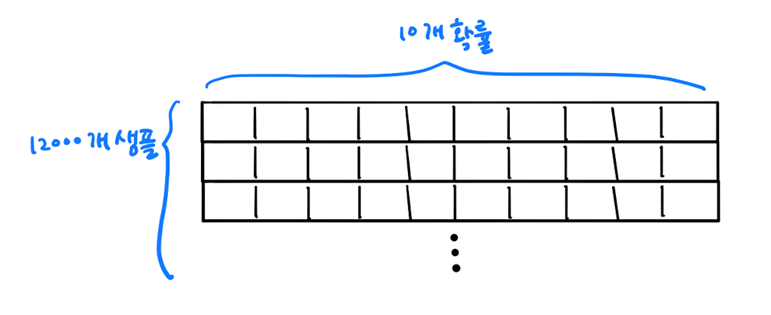
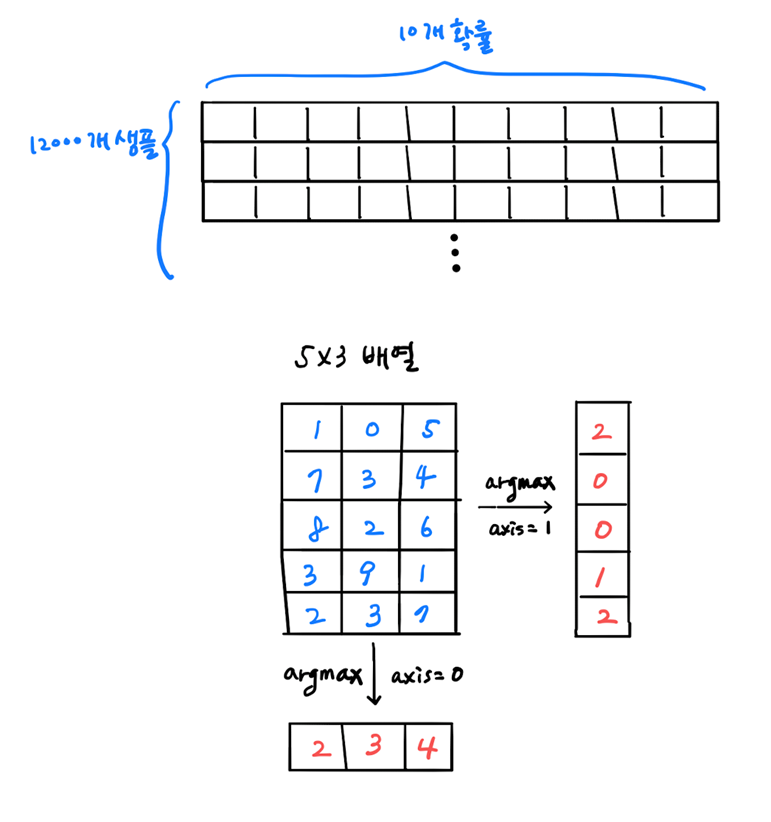

### 저장된 모델을 읽어와서 모델을 이용한 평가

### 결과
- 두 모델은 같은 모델임 : 동일한 모델의 파라미터를 사용하고 있음
    - 정확도의 결과도 동일함

## 콜백
- 위 예제는 20번의 에포크동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인한 후 다시 그 지점까지 다시 훈련하는 방법을 사용함
    - 모델을 다시 훈련하지 않고 한번에 끝내려면????
- 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
    - fit()메서드에 callbacks 매개변수에 리스트로 전달하여 사용
- keras.callbacks.ModelCheckpoint() : 최상의 검증 점수를 낸 모델이 저장(베스트 파라미터 모델과 같은 개념)

- 다시 학습 하지 않기 때문에 훨씬 간편함
    - but, 10번 정도에서 최적의 모델을 찾았음에도 20번까지 학습해야 함
    - 조기종료 사용 훈련 중지
- 조기종료 : 학습을 일찍 중지하여 과대적합을 방지하는 기법

#### early-stopping callback
- 조기종료 콜백
- patience 매개변수를 활용
- ex. patience=2 로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
- restore_best_weights=True 로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
    - 최적 모델에서 몇번 더 훈련을 진행하므로 가중치를 저장하려면 파라미터를 되돌릴 필요가 있음